In [ ]:
!wget http://www02.smt.ufrj.br/~offshore/mfs/database/mafaulda/horizontal-misalignment.zip

--2022-02-04 15:28:40--  http://www02.smt.ufrj.br/~offshore/mfs/database/mafaulda/horizontal-misalignment.zip
Resolving www02.smt.ufrj.br (www02.smt.ufrj.br)... 146.164.99.22
Connecting to www02.smt.ufrj.br (www02.smt.ufrj.br)|146.164.99.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1306244927 (1.2G) [application/zip]
Saving to: ‘horizontal-misalignment.zip’

horizontal-misalign 100%[===================>]   1.22G  4.99MB/s    in 3m 33s  

2022-02-04 15:32:14 (5.84 MB/s) - ‘horizontal-misalignment.zip’ saved [1306244927/1306244927]



In [ ]:
!wget http://www02.smt.ufrj.br/~offshore/mfs/database/mafaulda/normal.zip

--2022-02-04 14:55:34--  http://www02.smt.ufrj.br/~offshore/mfs/database/mafaulda/normal.zip
Resolving www02.smt.ufrj.br (www02.smt.ufrj.br)... 146.164.99.22
Connecting to www02.smt.ufrj.br (www02.smt.ufrj.br)|146.164.99.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 325307137 (310M) [application/zip]
Saving to: ‘normal.zip’

normal.zip          100%[===================>] 310.24M  7.37MB/s    in 53s     

2022-02-04 14:56:27 (5.89 MB/s) - ‘normal.zip’ saved [325307137/325307137]



In [ ]:
!mv /content/horizontal-misalignment.zip /content/drive/MyDrive/FYP_FINAL/HMA
!mv /content/normal.zip /content/drive/MyDrive/FYP_FINAL

In [ ]:
!unzip /content/drive/MyDrive/FinalYearProject/normal.zip
!unzip /content/drive/MyDrive/FinalYearProject/horizontal-misalignment.zip

Archive:  /content/drive/MyDrive/FinalYearProject/normal.zip
   creating: normal/
  inflating: normal/12.288.csv       
  inflating: normal/13.1072.csv      
  inflating: normal/14.336.csv       
  inflating: normal/15.1552.csv      
  inflating: normal/16.1792.csv      
  inflating: normal/17.2032.csv      
  inflating: normal/18.432.csv       
  inflating: normal/19.6608.csv      
  inflating: normal/20.2752.csv      
  inflating: normal/21.7088.csv      
  inflating: normal/22.3232.csv      
  inflating: normal/23.552.csv       
  inflating: normal/24.576.csv       
  inflating: normal/25.6.csv         
  inflating: normal/26.624.csv       
  inflating: normal/27.4432.csv      
  inflating: normal/28.8768.csv      
  inflating: normal/29.4912.csv      
  inflating: normal/30.72.csv        
  inflating: normal/31.744.csv       
  inflating: normal/32.9728.csv      
  inflating: normal/33.5872.csv      
  inflating: normal/34.2016.csv      
  inflating: normal/35.4304.csv      
  infl

#Imports & Functions

In [ ]:
!pip install mat73
!pip install ewtpy
!pip install scaleogram

In [ ]:
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from scipy.io import loadmat
from scipy import signal
import mat73

import random
import pywt
import gc
import scaleogram as scg 

from skimage.transform import resize
from skimage import data, color
import ewtpy

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


import keras
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.callbacks import History 

import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Dense,Flatten,GlobalMaxPooling2D,MaxPooling2D,BatchNormalization,Dropout
from tensorflow.keras.layers import Conv1D,MaxPooling1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

import itertools

from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.recurrent import LSTM
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Concatenate,Average

In [ ]:
def make_confusion_matrix(y_true,y_pred,classes=None, figsize=(10,10),text_size=15):
        """
        # Note: The following confusion matrix code is a remix of Scikit-Learn's 
        # plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
        # and Made with ML's introductory notebook - https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
        """
    
        cm = confusion_matrix(y_true, tf.round(y_pred))
        cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
        n_classes = cm.shape[0]

        fig, ax = plt.subplots(figsize=figsize)
        cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
        fig.colorbar(cax)

        if classes:
            labels = classes
        else:
            labels = np.arange(cm.shape[0])


        ax.set(title="Confusion Matrix",
                xlabel="Predicted label",
                ylabel="True label",
                xticks=np.arange(n_classes),
                yticks=np.arange(n_classes),
                xticklabels=labels,
                yticklabels=labels)

    
        ax.xaxis.set_label_position("bottom")
        ax.xaxis.tick_bottom()

        ax.xaxis.label.set_size(text_size)
        ax.yaxis.label.set_size(text_size)
        ax.title.set_size(text_size)

    
        threshold = (cm.max() + cm.min()) / 2.


        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                    horizontalalignment="center",
                    color="white" if cm[i, j] > threshold else "black",
                    size=text_size)

In [ ]:
cur_path = "/content/"
normal_path = glob.glob(cur_path+'/normal/*.csv',recursive=True)
HMA_0_5mm_path = glob.glob(cur_path+'/horizontal-misalignment/0.5mm/*.csv',recursive=True)
HMA_1mm_path = glob.glob(cur_path+'/horizontal-misalignment/1.0mm/*.csv',recursive=True)
HMA_1_5mm_path = glob.glob(cur_path+'/horizontal-misalignment/1.5mm/*.csv',recursive=True)
HMA_2mm_path = glob.glob(cur_path+'/horizontal-misalignment/2.0mm/*.csv',recursive=True)

In [ ]:
columns=["Tachometer signal","ax_UBA","r_UBA","tan_UBA","ax_OBA","r_OBA","tan_OBA","mic"]

# Visualisation and Downsampling


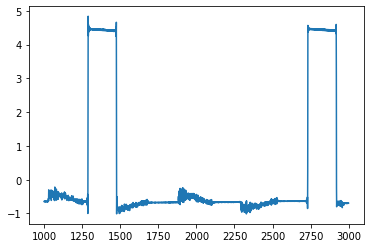

In [ ]:
pd.read_csv(normal_path[0],header=None)[1000:3000].iloc[:,0].plot();

In [ ]:
pd.read_csv(HMA_1mm_path[0],header=None)[1000:5000].iloc[:,0].plot();

In [ ]:
num_samples=5000
def resampler(path):
    data_n = pd.DataFrame()
    for i in path:
        _data = pd.read_csv(i,header=None).to_numpy()
        resampled_df=pd.DataFrame()
        for j in range(8):
          resample=pd.DataFrame(signal.resample(_data[:,j],num_samples))
          resampled_df=pd.concat([resampled_df,resample],axis=1,ignore_index=True)

        data_n = pd.concat([data_n,resampled_df],ignore_index=True)
    return data_n

In [ ]:
data_n = resampler(normal_path)
data_hma0_5mm = resampler(HMA_0_5mm_path)
data_hma1mm = resampler(HMA_1mm_path)
data_hma1_5mm = resampler(HMA_1_5mm_path)
data_hma2mm = resampler(HMA_2mm_path)

In [ ]:
data_n.shape,data_hma0_5mm.shape

((245000, 8), (0, 0))

In [ ]:
data_n.columns=columns
data_hma0_5mm.columns=columns
data_hma1mm.columns=columns
data_hma1_5mm.columns=columns
data_hma2mm.columns=columns

In [ ]:
data_n

,Tachometer signal,ax_UBA,r_UBA,tan_UBA,ax_OBA,r_OBA,tan_OBA,mic
0,2.087772,-0.115172,0.305481,-0.100035,-0.377894,-0.026094,-0.130649,0.033791
1,0.459222,-0.225380,0.057148,-0.083817,-0.667486,-0.016709,-0.432463,0.023291
2,-1.077300,0.126110,-0.025486,-0.069024,-0.608853,-0.057748,-0.337855,0.004615
3,-0.436059,0.781473,0.007849,0.044782,-0.437018,-0.001562,-0.490326,-0.013142
4,-0.645573,0.148911,0.183732,0.033039,-0.998795,-0.020726,-0.629307,-0.014069
...,...,...,...,...,...,...,...,...
244995,-0.684912,-0.507780,-0.269682,-0.103900,0.121395,-0.007643,-0.030645,0.061261
244996,-0.656154,-0.625581,-0.198742,0.039506,-0.242245,-0.008729,-0.138947,0.086182
244997,-0.724913,-0.455843,-0.275717,0.010659,0.296400,0.047390,-0.051885,0.058976
244998,-0.611339,0.106267,-0.158578,-0.061758,0.198244,0.009450,0.061029,0.025750


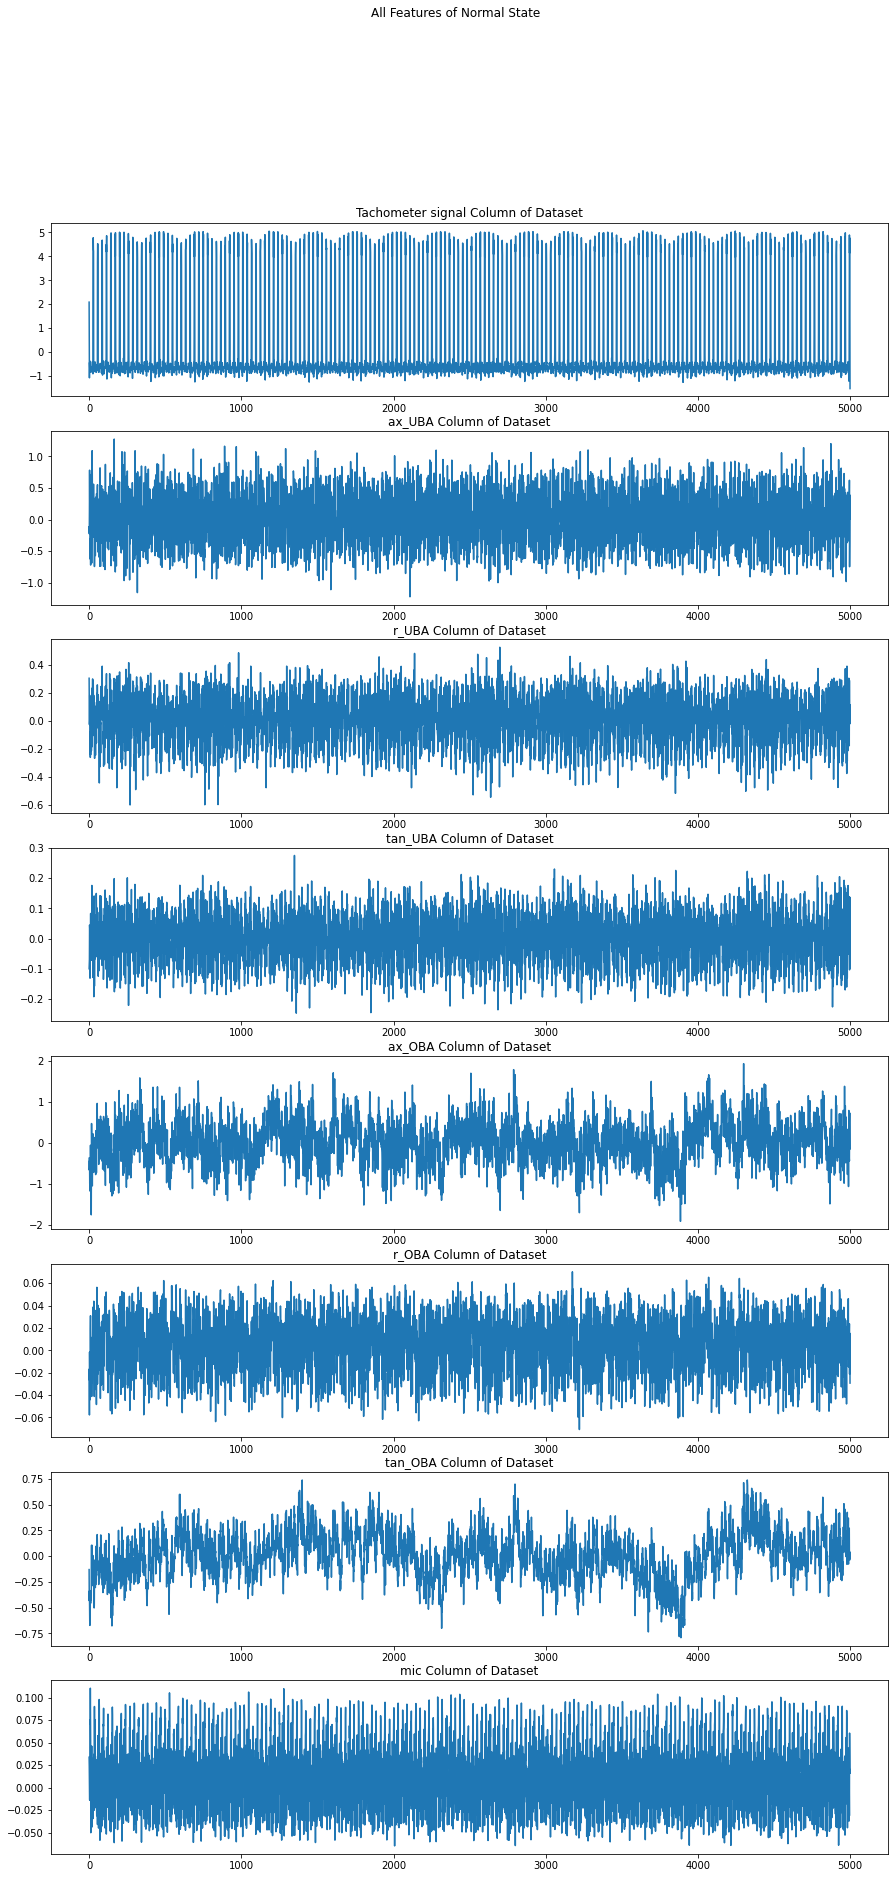

In [ ]:
fig, axs = plt.subplots(8, sharex=False, sharey=False,figsize=(15,30))
fig.suptitle('All Features of Normal State')
for i in range(len(data_n.columns)):
    axs[i].plot(data_n[columns[i]][:num_samples])
    axs[i].set_title('{} Column of Dataset'.format(columns[i]))

In [ ]:
fig, axs = plt.subplots(8, sharex=False, sharey=False,figsize=(15,30))
fig.suptitle('All Features of Imbalance 6g State')
for i in range(len(data_hma0_5mm.columns)):
    axs[i].plot(data_hma0_5mm[columns[i]][:num_samples])
    axs[i].set_title('{} Column of Dataset'.format(columns[i]))

# Data Preprocessing

In [ ]:
data_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245000 entries, 0 to 244999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Tachometer signal  245000 non-null  float64
 1   ax_UBA             245000 non-null  float64
 2   r_UBA              245000 non-null  float64
 3   tan_UBA            245000 non-null  float64
 4   ax_OBA             245000 non-null  float64
 5   r_OBA              245000 non-null  float64
 6   tan_OBA            245000 non-null  float64
 7   mic                245000 non-null  float64
dtypes: float64(8)
memory usage: 15.0 MB


Misalignment (mm) Measurements

* 0.5 50
* 1 49
* 1.5 49
* 2.0 49

Total 197

Normal 49

In [ ]:
x_0=data_n.to_numpy().reshape(-1,num_samples,8)
x_1=data_hma0_5mm.to_numpy().reshape(-1,num_samples,8)
x_2=data_hma1mm.to_numpy().reshape(-1,num_samples,8)
x_3=data_hma1_5mm.to_numpy().reshape(-1,num_samples,8)
x_4=data_hma2mm.to_numpy().reshape(-1,num_samples,8)

In [ ]:
X_data=np.vstack((x_0,x_1,x_2,x_3,x_4))
X_data.shape

(246, 5000, 8)

In [ ]:
y_0 = pd.DataFrame(np.zeros(int(len(x_0)),dtype=int))
y_1 = pd.DataFrame(np.ones(int(len(x_1)),dtype=int))
y_2 = pd.DataFrame(np.full((int(len(x_2)),1),2))
y_3 = pd.DataFrame(np.full((int(len(x_3)),1),3))
y_4 = pd.DataFrame(np.full((int(len(x_4)),1),4))
y_train_data = pd.concat([y_0,y_1,y_2,y_3,y_4], ignore_index=True).to_numpy()

In [ ]:
y_train_data.shape

(246, 1)

In [ ]:
y_train_data=y_train_data.reshape(-1)
y_train_data.shape

(246,)

In [ ]:
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# train is now 75% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X_data, y_train_data, test_size=1 - train_ratio,stratify=y_train_data)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio),stratify=y_test)


In [ ]:
X_train.shape,X_test.shape,X_val.shape

((172, 5000, 8), (37, 5000, 8), (37, 5000, 8))

In [ ]:
y_train.shape,y_test.shape,y_val.shape

((172,), (37,), (37,))

In [ ]:
# Setting up data in terms of time data by swapping a frame over the signal
time_frame=1000 # 1 sec (for time frame of 1  sec of) ## Variable

time_interval=200 #0.2s shorter the better. But larger for easy computation ## Variable


X_train_rnn=np.array(np.ones((1,8)))
y_train_rnn=[]


count=0

for i in X_train:
  for j in range(time_frame//2,len(i)-time_frame//2,time_interval):
    X_train_rnn=np.vstack((X_train_rnn,i[j-time_frame//2:j+time_frame//2]))
    y_train_rnn.append(y_train[count])

  count+=1
  if count%50==0:
    print("Processed {} Train features ".format(count))
    print(X_train_rnn.shape)

Processed 50 Train features 
(1000001, 8)
Processed 100 Train features 
(2000001, 8)
Processed 150 Train features 
(3000001, 8)


In [ ]:
# Setting up data in terms of time data by swapping a frame over the signal
time_frame=1000 # 1 sec (for time frame of 1  sec of) ## Variable

time_interval=200 #0.2s shorter the better. But larger for easy computation ## Variable


X_test_rnn=np.array(np.ones((1,8)))
y_test_rnn=[]


count=0

for i in X_test:
  for j in range(time_frame//2,len(i)-time_frame//2,time_interval):
    X_test_rnn=np.vstack((X_test_rnn,i[j-time_frame//2:j+time_frame//2]))
    y_test_rnn.append(y_test[count])

  count+=1
  if count%50==0:
    print("Processed {} Test features ".format(count))
    print(X_test_rnn.shape)

In [ ]:
# Setting up data in terms of time data by swapping a frame over the signal
time_frame=1000 # 1 sec (for time frame of 1  sec of) ## Variable

time_interval=200 #0.2s shorter the better. But larger for easy computation ## Variable


X_val_rnn=np.array(np.ones((1,8)))
y_val_rnn=[]


count=0

for i in X_val:
  for j in range(time_frame//2,len(i)-time_frame//2,time_interval):
    X_val_rnn=np.vstack((X_val_rnn,i[j-time_frame//2:j+time_frame//2]))
    y_val_rnn.append(y_val[count])

  count+=1
  if count%50==0:
    print("Processed {} Val features ".format(count))
    print(X_val_rnn.shape)

In [ ]:
X_train_rnn.shape,X_test_rnn.shape,X_val_rnn.shape

((3440001, 8), (740001, 8), (740001, 8))

In [ ]:
X_train_rnn=X_train_rnn[1:,:].reshape(-1,time_frame,8)
X_test_rnn=X_test_rnn[1:,:].reshape(-1,time_frame,8)
X_val_rnn=X_val_rnn[1:,:].reshape(-1,time_frame,8)

In [ ]:
X_train_rnn.shape,X_test_rnn.shape,X_val_rnn.shape

((3440, 1000, 8), (740, 1000, 8), (740, 1000, 8))

In [ ]:
np.array(y_train_rnn).shape,np.array(y_test_rnn).shape,np.array(y_val_rnn).shape

((3440,), (740,), (740,))

In [ ]:
X_train=X_train_rnn
X_test=X_test_rnn
X_val=X_val_rnn

y_train=np.array(y_train_rnn)
y_test=np.array(y_test_rnn)
y_val=np.array(y_val_rnn)

In [ ]:
np.save("/content/drive/MyDrive/FYP_FINAL/HMA/X_train",X_train)
np.save("/content/drive/MyDrive/FYP_FINAL/HMA/X_test",X_test)
np.save("/content/drive/MyDrive/FYP_FINAL/HMA/X_val",X_val)

np.save("/content/drive/MyDrive/FYP_FINAL/HMA/y_train",y_train)
np.save("/content/drive/MyDrive/FYP_FINAL/HMA/y_test",y_test)
np.save("/content/drive/MyDrive/FYP_FINAL/HMA/y_val",y_val)

# Modelling

## CNN

In [ ]:
X_train=np.load("/content/drive/MyDrive/FYP_FINAL/HMA/X_train.npy")
X_test=np.load("/content/drive/MyDrive/FYP_FINAL/HMA/X_test.npy")
X_val=np.load("/content/drive/MyDrive/FYP_FINAL/HMA/X_val.npy")

y_train=np.load("/content/drive/MyDrive/FYP_FINAL/HMA/y_train.npy")
y_test=np.load("/content/drive/MyDrive/FYP_FINAL/HMA/y_test.npy")
y_val=np.load("/content/drive/MyDrive/FYP_FINAL/HMA/y_val.npy")

In [ ]:
X_train.shape,X_test.shape,X_val.shape

((3440, 1000, 8), (740, 1000, 8), (740, 1000, 8))

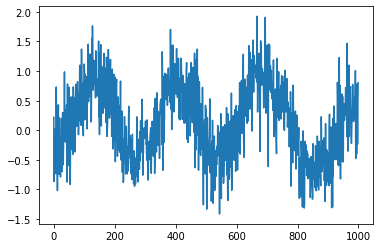

In [ ]:
i=500
j=4
signal=X_train[i,:,j]
plt.plot(signal);

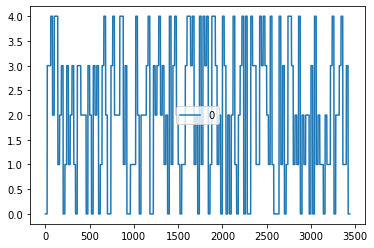

In [ ]:
pd.DataFrame(np.array(y_train)).plot();

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

In [ ]:
num_classes=5
n_timesteps=1000
n_features=8

In [ ]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)
y_val = keras.utils.np_utils.to_categorical(y_val, num_classes)

In [ ]:
batch_size = 16
epochs =100

train_size = X_train.shape[0]
val_size=X_val.shape[0]
test_size= X_test.shape[0]

In [ ]:
alpha = 0.425
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation=tf.keras.layers.LeakyReLU(alpha), input_shape=(n_timesteps,n_features)))
# model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=2, activation=tf.keras.layers.LeakyReLU(alpha)))
# model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=2, activation=tf.keras.layers.LeakyReLU(alpha)))
# model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation=tf.keras.layers.LeakyReLU(alpha)))
model.add(Dropout(0.35))
model.add(Dense(64, activation=tf.keras.layers.LeakyReLU(alpha)))
model.add(Dropout(0.35))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_57 (Conv1D)          (None, 999, 128)          2176      
                                                                 
 max_pooling1d_57 (MaxPoolin  (None, 499, 128)         0         
 g1D)                                                            
                                                                 
 conv1d_58 (Conv1D)          (None, 498, 64)           16448     
                                                                 
 max_pooling1d_58 (MaxPoolin  (None, 249, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_59 (Conv1D)          (None, 248, 32)           4128      
                                                                 
 max_pooling1d_59 (MaxPoolin  (None, 124, 32)        

In [ ]:
checkpoint=ModelCheckpoint("/content/trained_model/hma_base_CNN.hd5",monitor="val_loss",mode="min",
                           save_best_only=True,verbose=1)

earlystop=EarlyStopping(monitor="val_loss",min_delta=0,patience=20,verbose=1,restore_best_weights=True)

reduce_lr=ReduceLROnPlateau(monitor="val_loss",factor=0.2,patience=5,verbose=1,min_delta=0.0001)

callbacks=[checkpoint,earlystop,reduce_lr]

In [ ]:
model.fit(X_train, y_train,steps_per_epoch=train_size//batch_size,
          batch_size=batch_size,
          epochs=epochs, validation_steps=val_size//batch_size,
          validation_data=(X_val, y_val),
          callbacks=callbacks)

Epoch 1/100
211/215 [============================>.] - ETA: 0s - loss: 1.0854 - accuracy: 0.4967
Epoch 1: val_loss improved from inf to 0.70962, saving model to /content/trained_model/hma_base_CNN.hd5


INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


215/215 [==============================] - 6s 24ms/step - loss: 1.0781 - accuracy: 0.5000 - val_loss: 0.7096 - val_accuracy: 0.6481 - lr: 0.0010
Epoch 2/100
211/215 [============================>.] - ETA: 0s - loss: 0.4288 - accuracy: 0.8371
Epoch 2: val_loss improved from 0.70962 to 0.30416, saving model to /content/trained_model/hma_base_CNN.hd5


INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


215/215 [==============================] - 5s 22ms/step - loss: 0.4271 - accuracy: 0.8384 - val_loss: 0.3042 - val_accuracy: 0.8356 - lr: 0.0010
Epoch 3/100
213/215 [============================>.] - ETA: 0s - loss: 0.2366 - accuracy: 0.9205
Epoch 3: val_loss improved from 0.30416 to 0.29922, saving model to /content/trained_model/hma_base_CNN.hd5


INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


215/215 [==============================] - 4s 19ms/step - loss: 0.2358 - accuracy: 0.9206 - val_loss: 0.2992 - val_accuracy: 0.8899 - lr: 0.0010
Epoch 4/100
209/215 [============================>.] - ETA: 0s - loss: 0.1200 - accuracy: 0.9605
Epoch 4: val_loss improved from 0.29922 to 0.23155, saving model to /content/trained_model/hma_base_CNN.hd5


INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


215/215 [==============================] - 4s 18ms/step - loss: 0.1188 - accuracy: 0.9605 - val_loss: 0.2316 - val_accuracy: 0.9130 - lr: 0.0010
Epoch 5/100
210/215 [============================>.] - ETA: 0s - loss: 0.0918 - accuracy: 0.9664
Epoch 5: val_loss did not improve from 0.23155
215/215 [==============================] - 2s 10ms/step - loss: 0.0907 - accuracy: 0.9669 - val_loss: 0.4311 - val_accuracy: 0.8940 - lr: 0.0010
Epoch 6/100
214/215 [============================>.] - ETA: 0s - loss: 0.0727 - accuracy: 0.9717
Epoch 6: val_loss improved from 0.23155 to 0.11625, saving model to /content/trained_model/hma_base_CNN.hd5


INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


215/215 [==============================] - 4s 18ms/step - loss: 0.0724 - accuracy: 0.9718 - val_loss: 0.1163 - val_accuracy: 0.9647 - lr: 0.0010
Epoch 7/100
212/215 [============================>.] - ETA: 0s - loss: 0.0606 - accuracy: 0.9823
Epoch 7: val_loss improved from 0.11625 to 0.08046, saving model to /content/trained_model/hma_base_CNN.hd5


INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


215/215 [==============================] - 3s 12ms/step - loss: 0.0602 - accuracy: 0.9826 - val_loss: 0.0805 - val_accuracy: 0.9660 - lr: 0.0010
Epoch 8/100
213/215 [============================>.] - ETA: 0s - loss: 0.0575 - accuracy: 0.9786
Epoch 8: val_loss did not improve from 0.08046
215/215 [==============================] - 1s 5ms/step - loss: 0.0574 - accuracy: 0.9788 - val_loss: 0.5536 - val_accuracy: 0.9049 - lr: 0.0010
Epoch 9/100
214/215 [============================>.] - ETA: 0s - loss: 0.0686 - accuracy: 0.9790
Epoch 9: val_loss did not improve from 0.08046
215/215 [==============================] - 1s 5ms/step - loss: 0.0687 - accuracy: 0.9788 - val_loss: 0.3209 - val_accuracy: 0.8927 - lr: 0.0010
Epoch 10/100
214/215 [============================>.] - ETA: 0s - loss: 0.1120 - accuracy: 0.9734
Epoch 10: val_loss did not improve from 0.08046
215/215 [==============================] - 1s 5ms/step - loss: 0.1115 - accuracy: 0.9735 - val_loss: 0.0956 - val_accuracy: 0.9688 - 

INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


215/215 [==============================] - 3s 13ms/step - loss: 0.0036 - accuracy: 0.9991 - val_loss: 0.0785 - val_accuracy: 0.9688 - lr: 2.0000e-04
Epoch 14/100
214/215 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 14: val_loss did not improve from 0.07851
215/215 [==============================] - 1s 6ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0825 - val_accuracy: 0.9688 - lr: 2.0000e-04
Epoch 15/100
207/215 [===========================>..] - ETA: 0s - loss: 0.0033 - accuracy: 0.9994
Epoch 15: val_loss improved from 0.07851 to 0.05592, saving model to /content/trained_model/hma_base_CNN.hd5


INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


215/215 [==============================] - 2s 12ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0559 - val_accuracy: 0.9810 - lr: 2.0000e-04
Epoch 16/100
214/215 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 16: val_loss did not improve from 0.05592
215/215 [==============================] - 1s 5ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0754 - val_accuracy: 0.9715 - lr: 2.0000e-04
Epoch 17/100
207/215 [===========================>..] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 17: val_loss did not improve from 0.05592
215/215 [==============================] - 1s 5ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0790 - val_accuracy: 0.9688 - lr: 2.0000e-04
Epoch 18/100
212/215 [============================>.] - ETA: 0s - loss: 0.0024 - accuracy: 0.9991
Epoch 18: val_loss did not improve from 0.05592
215/215 [==============================] - 1s 5ms/step - loss: 0.0024 - accuracy: 0.9991 - val_loss: 0.0613 - val_acc

INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


215/215 [==============================] - 2s 12ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0556 - val_accuracy: 0.9823 - lr: 2.0000e-04
Epoch 20/100
212/215 [============================>.] - ETA: 0s - loss: 0.0022 - accuracy: 0.9991
Epoch 20: val_loss did not improve from 0.05556
215/215 [==============================] - 1s 5ms/step - loss: 0.0022 - accuracy: 0.9991 - val_loss: 0.0752 - val_accuracy: 0.9810 - lr: 2.0000e-04
Epoch 21/100
213/215 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 21: val_loss did not improve from 0.05556
215/215 [==============================] - 1s 5ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0798 - val_accuracy: 0.9742 - lr: 2.0000e-04
Epoch 22/100
210/215 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 22: val_loss did not improve from 0.05556
215/215 [==============================] - 1s 5ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0673 - val_acc

In [ ]:
class_names=["healthy","0.5mm","1mm","1.5mm","2mm"]

In [ ]:
y_pred_probs=model.predict(X_test)
y_true=np.argmax(y_test,axis=1)


In [ ]:
y_pred=np.argmax(y_pred_probs,axis=1)

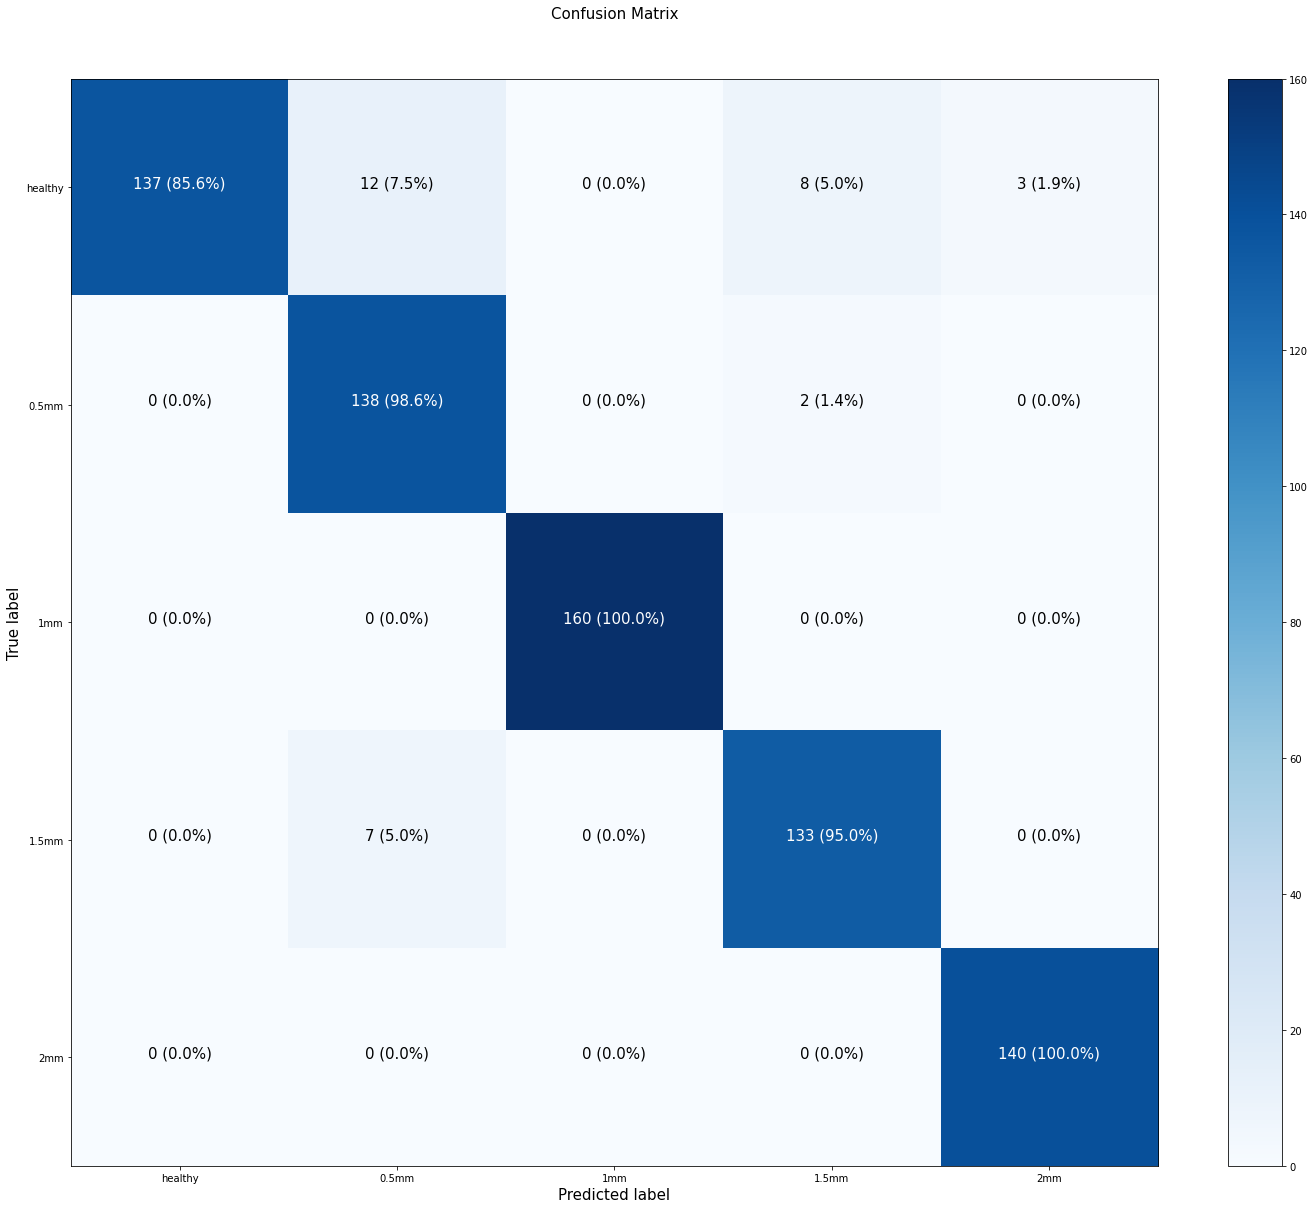

In [ ]:
make_confusion_matrix(y_true,y_pred,classes=class_names,figsize=(25,20))

In [ ]:
print(classification_report(y_true,y_pred,target_names=class_names))

              precision    recall  f1-score   support

     healthy       1.00      0.86      0.92       160
       0.5mm       0.88      0.99      0.93       140
         1mm       1.00      1.00      1.00       160
       1.5mm       0.93      0.95      0.94       140
         2mm       0.98      1.00      0.99       140

    accuracy                           0.96       740
   macro avg       0.96      0.96      0.96       740
weighted avg       0.96      0.96      0.96       740



In [ ]:
model.evaluate(X_test,y_test)

24/24 [==============================] - 0s 5ms/step - loss: 0.2301 - accuracy: 0.9568


[0.2301303595304489, 0.9567567706108093]

In [ ]:
!zip -r /content/drive/MyDrive/FYP_FINAL/HMA/hma_cnn_trained_model_apr.zip /content/trained_model

## EWT + CNN



### Applying EWT

In [ ]:
X_train=np.load("/content/drive/MyDrive/FYP_FINAL/HMA/X_train.npy")
X_test=np.load("/content/drive/MyDrive/FYP_FINAL/HMA/X_test.npy")
X_val=np.load("/content/drive/MyDrive/FYP_FINAL/HMA/X_val.npy")

y_train=np.load("/content/drive/MyDrive/FYP_FINAL/HMA/y_train.npy")
y_test=np.load("/content/drive/MyDrive/FYP_FINAL/HMA/y_test.npy")
y_val=np.load("/content/drive/MyDrive/FYP_FINAL/HMA/y_val.npy")

In [ ]:
X_train.shape,X_test.shape,X_val.shape

In [ ]:
y_train.shape,y_test.shape,y_val.shape

In [ ]:
i=500
j=4
signal=X_train[i,:,j]
plt.plot(signal)

In [ ]:
# Standardising and applying ewt transform
scaler=StandardScaler()
ewt,  _ ,_ = ewtpy.EWT1D(scaler.fit_transform(signal.reshape(-1,1)).reshape(-1),N=201)

In [ ]:
ewt.shape

In [ ]:
plt.imshow(resize(ewt,(64,64)))

In [ ]:
train_size = X_train.shape[0]
val_size=X_val.shape[0]
test_size= X_test.shape[0]

In [ ]:
# Runtime is approx  5 hrs
train_data_ewt = np.ndarray(shape=(train_size, 64, 64, 8))

for i in range(0,train_size):
    if i%40 == 0:
        print("Processsing {}/{} features".format(i,train_size))
    if (i+1) % 200 == 0:
        print("Saving {}/{} features".format(i,train_size))
        np.save('/content/drive/MyDrive/FYP_FINAL/HMA/hma_train_data_ewt_epoch{}'.format(i),train_data_ewt)
    for j in range(0,8):
        ewt,  _ ,_ = ewtpy.EWT1D(scaler.fit_transform(X_train[i,:,j].reshape(-1,1)).reshape(-1), N = 201)
        train_data_ewt[i, :, :, j] = resize(ewt, (64, 64))

Processsing 0/3440 features
Processsing 40/3440 features
Processsing 80/3440 features
Processsing 120/3440 features
Processsing 160/3440 features
Saving 199/3440 features
Processsing 200/3440 features
Processsing 240/3440 features
Processsing 280/3440 features
Processsing 320/3440 features
Processsing 360/3440 features
Saving 399/3440 features
Processsing 400/3440 features
Processsing 440/3440 features
Processsing 480/3440 features
Processsing 520/3440 features
Processsing 560/3440 features
Saving 599/3440 features
Processsing 600/3440 features
Processsing 640/3440 features
Processsing 680/3440 features
Processsing 720/3440 features
Processsing 760/3440 features
Saving 799/3440 features
Processsing 800/3440 features
Processsing 840/3440 features
Processsing 880/3440 features
Processsing 920/3440 features
Processsing 960/3440 features
Saving 999/3440 features
Processsing 1000/3440 features
Processsing 1040/3440 features
Processsing 1080/3440 features
Processsing 1120/3440 features
Proce

In [ ]:
np.save('/content/drive/MyDrive/FYP_FINAL/HMA/hma_train_data_ewt_full',train_data_ewt)

In [ ]:
# Takes 130 mins
val_data_ewt = np.ndarray(shape=(val_size, 64, 64, 8))

for i in range(0,val_size):
    if i%40 == 0:
        print("Processsing {}/{} features".format(i,val_size))
    if (i+1) % 200 == 0:
        print("Saving {}/{} features".format(i,val_size))
        np.save('/content/drive/MyDrive/FYP_FINAL/HMA/hma_val_data_ewt_epoch{}'.format(i),val_data_ewt)
    for j in range(0,8):
        ewt,  _ ,_ = ewtpy.EWT1D(scaler.fit_transform(X_val[i,:,j].reshape(-1,1)).reshape(-1), N = 500)
        val_data_ewt[i, :, :, j] = resize(ewt, (64, 64))

Processsing 0/740 features
Processsing 40/740 features
Processsing 80/740 features
Processsing 120/740 features
Processsing 160/740 features
Saving 199/740 features
Processsing 200/740 features
Processsing 240/740 features
Processsing 280/740 features
Processsing 320/740 features
Processsing 360/740 features
Saving 399/740 features
Processsing 400/740 features
Processsing 440/740 features
Processsing 480/740 features
Processsing 520/740 features
Processsing 560/740 features
Saving 599/740 features
Processsing 600/740 features
Processsing 640/740 features
Processsing 680/740 features
Processsing 720/740 features


In [ ]:
np.save('/content/drive/MyDrive/FYP_FINAL/HMA/hma_val_data_ewt_full',val_data_ewt)

In [ ]:
# Takes 130 mins
test_data_ewt = np.ndarray(shape=(test_size, 64, 64, 8))

for i in range(0,test_size):
    if i%40 == 0:
        print("Processsing {}/{} features".format(i,test_size))
    if (i+1) % 200 == 0:
        print("Saving {}/{} features".format(i,test_size))
        np.save('/content/drive/MyDrive/FYP_FINAL/HMA/hma_test_data_ewt_epoch{}'.format(i),test_data_ewt)
    for j in range(0,8):
        ewt,  _ ,_ = ewtpy.EWT1D(scaler.fit_transform(X_test[i,:,j].reshape(-1,1)).reshape(-1), N = 500)
        test_data_ewt[i, :, :, j] = resize(ewt, (64, 64))

Processsing 0/740 features
Processsing 40/740 features
Processsing 80/740 features
Processsing 120/740 features
Processsing 160/740 features
Saving 199/740 features
Processsing 200/740 features
Processsing 240/740 features
Processsing 280/740 features
Processsing 320/740 features
Processsing 360/740 features
Saving 399/740 features
Processsing 400/740 features
Processsing 440/740 features
Processsing 480/740 features
Processsing 520/740 features
Processsing 560/740 features
Saving 599/740 features
Processsing 600/740 features
Processsing 640/740 features
Processsing 680/740 features


In [ ]:
# Takes 130 mins
test_data_ewt = np.load("/content/drive/MyDrive/FYP_FINAL/HMA/hma_test_data_ewt_epoch599.npy")

for i in range(550,test_size):
    if i%40 == 0:
        print("Processsing {}/{} features".format(i,test_size))
    if (i+1) % 200 == 0:
        print("Saving {}/{} features".format(i,test_size))
        np.save('/content/drive/MyDrive/FYP_FINAL/HMA/hma_test_data_ewt_epoch{}'.format(i),test_data_ewt)
    for j in range(0,8):
        ewt,  _ ,_ = ewtpy.EWT1D(scaler.fit_transform(X_test[i,:,j].reshape(-1,1)).reshape(-1), N = 500)
        test_data_ewt[i, :, :, j] = resize(ewt, (64, 64))

Processsing 560/740 features
Saving 599/740 features
Processsing 600/740 features
Processsing 640/740 features
Processsing 680/740 features
Processsing 720/740 features


In [ ]:
np.save('/content/drive/MyDrive/FYP_FINAL/HMA/hma_test_data_ewt_full',test_data_ewt)

### Setting correct shapes

In [ ]:
train_data_ewt=np.load("/content/drive/MyDrive/FYP_FINAL/HMA/hma_train_data_ewt_full.npy")
test_data_ewt=np.load("/content/drive/MyDrive/FYP_FINAL/HMA/hma_test_data_ewt_full.npy")
val_data_ewt=np.load("/content/drive/MyDrive/FYP_FINAL/HMA/hma_val_data_ewt_full.npy")

In [ ]:
train_data_ewt.shape, test_data_ewt.shape, val_data_ewt.shape

((3440, 64, 64, 8), (740, 64, 64, 8), (740, 64, 64, 8))

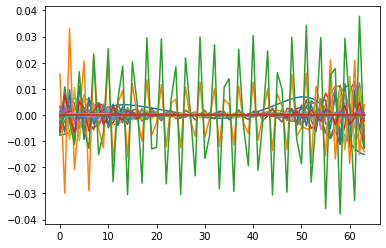

In [ ]:
plt.plot(train_data_ewt[100][:,:,0]);

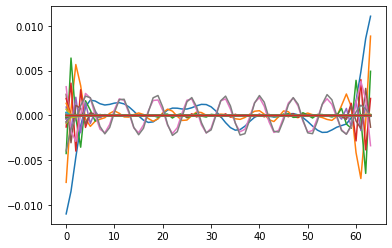

In [ ]:
plt.plot(test_data_ewt[100][:,:,0]);

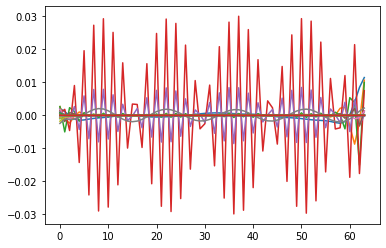

In [ ]:
plt.plot(val_data_ewt[100][:,:,0]);

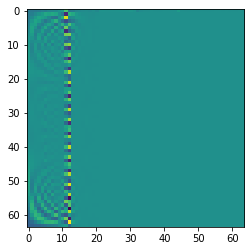

In [ ]:
plt.imshow(train_data_ewt[100][:,:,0]);

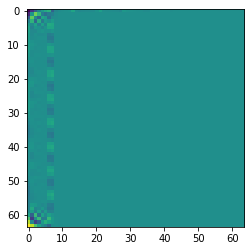

In [ ]:
plt.imshow(test_data_ewt[100][:,:,0]);

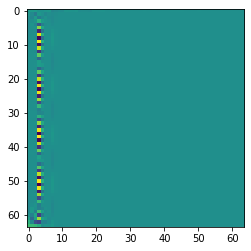

In [ ]:
plt.imshow(val_data_ewt[100][:,:,0]);

In [ ]:
y_train=np.load("/content/drive/MyDrive/FYP_FINAL/HMA/y_train.npy")
y_test=np.load("/content/drive/MyDrive/FYP_FINAL/HMA/y_test.npy")
y_val=np.load("/content/drive/MyDrive/FYP_FINAL/HMA/y_val.npy")

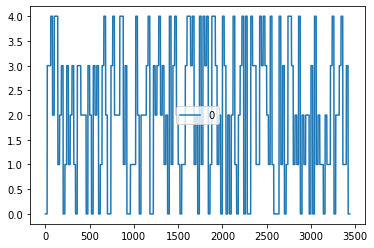

In [ ]:
pd.DataFrame(y_train).plot()

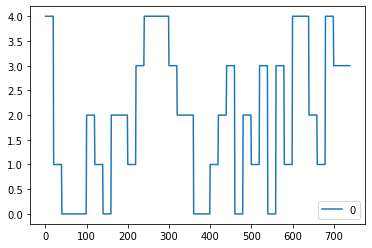

In [ ]:
pd.DataFrame(y_test).plot()

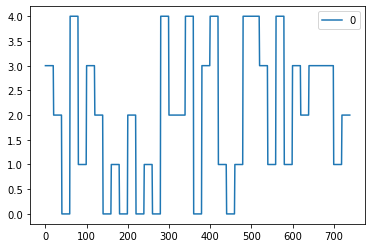

In [ ]:
pd.DataFrame(y_val).plot()

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4]), array([680, 700, 680, 680, 700]))

In [ ]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4]), array([160, 140, 160, 140, 140]))

In [ ]:
np.unique(y_val, return_counts=True)

(array([0, 1, 2, 3, 4]), array([140, 160, 140, 160, 140]))

In [ ]:
y_train = list(map(lambda x: int(x), y_train))
y_test = list(map(lambda x: int(x), y_test))
y_val = list(map(lambda x: int(x),y_val))

X_train = train_data_ewt
y_train = list(y_train)
X_test = test_data_ewt
y_test = list(y_test)
X_val = val_data_ewt
y_val = list(y_val)

In [ ]:
img_x = 64
img_y = 64
img_z = 8
input_shape = (img_x, img_y, img_z)
num_classes=5
 

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
 

In [ ]:
np.unique(y_train,return_counts = True)

(array([0, 1, 2, 3, 4]), array([680, 700, 680, 680, 700]))

In [ ]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)
y_val = keras.utils.np_utils.to_categorical(y_val, num_classes)

In [ ]:
X_train.shape, X_test.shape, X_val.shape

((3440, 64, 64, 8), (740, 64, 64, 8), (740, 64, 64, 8))

In [ ]:
y_train.shape, y_test.shape, y_val.shape

((3440, 5), (740, 5), (740, 5))

In [ ]:
model = Sequential()
model.add(Conv2D(8, (1, 1), activation='relu', input_shape=input_shape))
model.add(Dropout(0.5))
model.add(MaxPooling2D((1, 1)))
model.add(Conv2D(8, (1, 1), activation='relu', input_shape=input_shape))
model.add(Dropout(0.5))
model.add(MaxPooling2D((1, 1)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])

 


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 64, 64, 8)         72        
                                                                 
 dropout_17 (Dropout)        (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 64, 64, 8)         72        
                                                                 
 dropout_18 (Dropout)        (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                 

### Training

In [ ]:
batch_size = 4
epochs =100

train_size = X_train.shape[0]
val_size=X_val.shape[0]
test_size= X_test.shape[0]

In [ ]:
monitor = "val_loss"
checkpoint=ModelCheckpoint("/content/trained_model/EWT_CNN.hd5",monitor=monitor,mode="min",
                           save_best_only=True,verbose=1)

earlystop=EarlyStopping(monitor=monitor,min_delta=0,patience=10,verbose=1,restore_best_weights=True)

reduce_lr=ReduceLROnPlateau(monitor=monitor,factor=0.2,patience=5,verbose=1,min_delta=0.0001)

callbacks=[checkpoint,earlystop,reduce_lr]

In [ ]:
model.fit(X_train, y_train,steps_per_epoch=train_size//batch_size,
          batch_size=batch_size,
          epochs=100, validation_steps=val_size//batch_size,
          validation_data=(X_val, y_val),
          callbacks=callbacks)
 
 

Epoch 1/100
851/860 [============================>.] - ETA: 0s - loss: 1.5906 - accuracy: 0.2535
Epoch 1: val_loss improved from inf to 1.60433, saving model to /content/trained_model/EWT_CNN.hd5
INFO:tensorflow:Assets written to: /content/trained_model/EWT_CNN.hd5/assets
860/860 [==============================] - 10s 10ms/step - loss: 1.5907 - accuracy: 0.2532 - val_loss: 1.6043 - val_accuracy: 0.1932 - lr: 1.0000e-04
Epoch 2/100
860/860 [==============================] - ETA: 0s - loss: 1.5184 - accuracy: 0.3666
Epoch 2: val_loss did not improve from 1.60433
860/860 [==============================] - 5s 6ms/step - loss: 1.5184 - accuracy: 0.3666 - val_loss: 1.6281 - val_accuracy: 0.1892 - lr: 1.0000e-04
Epoch 3/100
853/860 [============================>.] - ETA: 0s - loss: 1.4457 - accuracy: 0.4068
Epoch 3: val_loss did not improve from 1.60433
860/860 [==============================] - 5s 6ms/step - loss: 1.4452 - accuracy: 0.4064 - val_loss: 1.6396 - val_accuracy: 0.1892 - lr: 1.00

In [ ]:
# !zip -r /content/drive/MyDrive/FYP_FINAL/HMA/hma_trained_model.zip /content/trained_model

### Evaluation

In [ ]:
classifier = model
# classifier=tf.keras.models.load_model("/content/trained_model/EWT_CNN.hd5")

In [ ]:
class_names=["healthy","0.5mm","1mm","1.5mm","2mm"]

In [ ]:
y_pred_probs=classifier.predict(X_test)
y_true=np.argmax(y_test,axis=1)


In [ ]:
y_pred=np.argmax(y_pred_probs,axis=1)

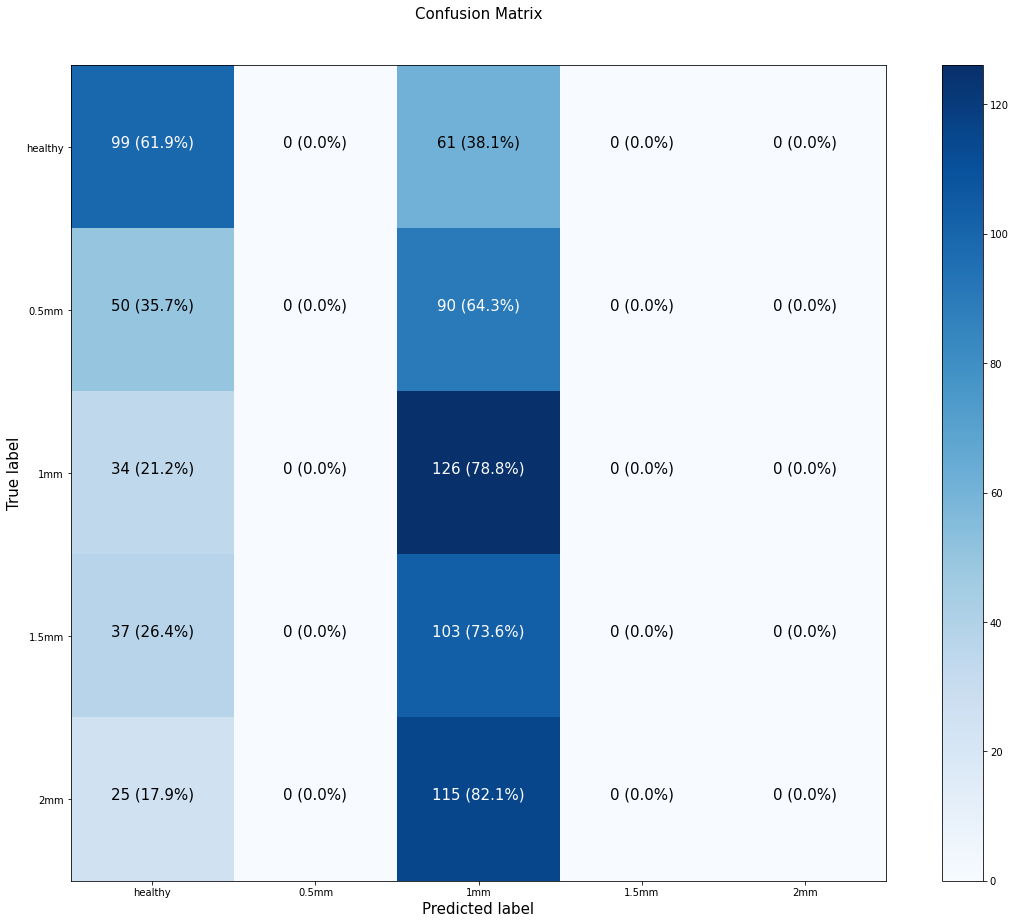

In [ ]:
make_confusion_matrix(y_true,y_pred,classes=class_names,figsize=(20,15))

In [ ]:
print(classification_report(y_true,y_pred,target_names=class_names))

              precision    recall  f1-score   support

     healthy       0.40      0.62      0.49       160
       0.5mm       0.00      0.00      0.00       140
         1mm       0.25      0.79      0.38       160
       1.5mm       0.00      0.00      0.00       140
         2mm       0.00      0.00      0.00       140

    accuracy                           0.30       740
   macro avg       0.13      0.28      0.17       740
weighted avg       0.14      0.30      0.19       740



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.evaluate(X_train ,y_train)

108/108 [==============================] - 1s 6ms/step - loss: 1.2260 - accuracy: 0.5483


[1.2260056734085083, 0.5482558012008667]

In [ ]:
model.evaluate(X_val,y_val)

24/24 [==============================] - 0s 6ms/step - loss: 1.7125 - accuracy: 0.3014


[1.712544322013855, 0.3013513386249542]

In [ ]:
model.evaluate(X_test,y_test)

24/24 [==============================] - 0s 5ms/step - loss: 1.7376 - accuracy: 0.3041


[1.7376067638397217, 0.30405405163764954]